# Client Clustering 

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler


#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Calidad de los clusters
# ==============================================================================
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Dataset 

In [3]:
df = pd.read_csv("../data/clients_cluster.csv")
df.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,4542,1,1,0,0,19,2.0
1,1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,4542,1,1,0,0,19,2.0
2,2,5008806,1,1,1,0,112500.0,4,4,1,1,59.0,1134,1,0,0,0,17,2.0
3,3,5008808,0,0,1,0,270000.0,0,4,3,1,52.0,3051,1,0,1,1,15,1.0
4,4,5008809,0,0,1,0,270000.0,0,4,3,1,52.0,3051,1,0,1,1,15,1.0


In [4]:
df= df.drop("Unnamed: 0",axis= 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  int64  
 7   NAME_EDUCATION_TYPE  438557 non-null  int64  
 8   NAME_FAMILY_STATUS   438557 non-null  int64  
 9   NAME_HOUSING_TYPE    438557 non-null  int64  
 10  DAYS_BIRTH           438557 non-null  float64
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Creating the Clusters 

In [15]:
# we start the Kmean model
model = KMeans()

# we call the method KElbowVisualizer to calculate the score of silhouette
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

# fiteamos el modelo
visualizer.fit(df)  

# we view the results
visualizer.show();

### Executing our model 

In [8]:
# we initiate the model
kmeans = KMeans(n_clusters=5)

# we fit our model
km_fit = kmeans.fit(df)

In [9]:
# the clusters that we generate
labels = km_fit.labels_
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [10]:
# the centers of our clusters 

centroides = km_fit.cluster_centers_
centroides

array([[ 6.14476380e+06,  3.27497425e-01,  3.68370237e-01,
         6.93687243e-01,  4.26412848e-01,  1.89204004e+05,
         2.42296923e+00,  3.11705877e+00,  1.36864380e+00,
         1.25471486e+00,  4.39229692e+01, -5.89815535e+04,
         1.00000000e+00,  2.04661753e-01,  2.85031540e-01,
         1.15312822e-01,  1.01114025e+01,  2.19116085e+00],
       [ 5.21997756e+06,  3.30576071e-01,  3.78368620e-01,
         6.58143224e-01,  4.37693528e-01,  1.84590608e+05,
         2.37767930e+00,  3.09774058e+00,  1.37362000e+00,
         1.26890968e+00,  4.37705345e+01, -6.21012432e+04,
         1.00000000e+00,  2.20033919e-01,  2.96241589e-01,
         8.09344056e-02,  1.01459708e+01,  2.19992341e+00],
       [ 6.61956679e+06,  3.30698839e-01,  3.76881198e-01,
         7.31361769e-01,  4.20283527e-01,  1.88538857e+05,
         2.39692058e+00,  3.11823147e+00,  1.35989807e+00,
         1.26767591e+00,  4.39519910e+01, -6.15256936e+04,
         1.00000000e+00,  1.88266847e-01,  2.69734204e

In [11]:
#We join our generate clusters to our dataframe

df["Cluster"] = labels
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Cluster
0,5008804,1,1,1,0,427500.0,4,1,0,4,33.0,4542,1,1,0,0,19,2.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,4,33.0,4542,1,1,0,0,19,2.0,1


In [20]:
df_cluster= df["Cluster"]

In [19]:
# we will save our clusters before continuing.
df_cluster.to_csv('../data/clusters.csv')

### Time to see what we got 

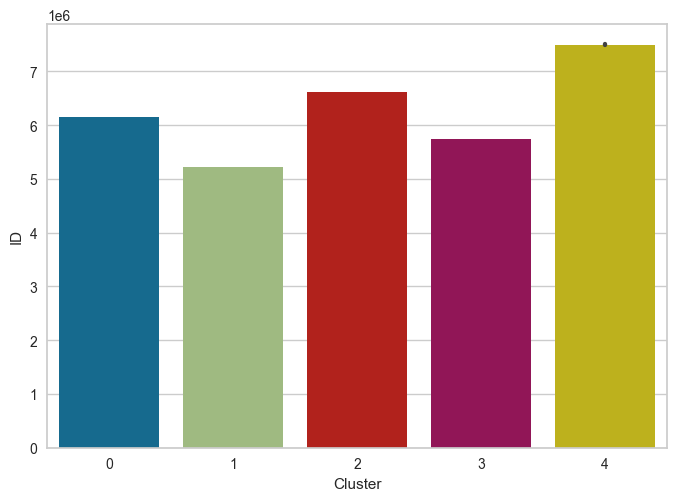

In [13]:
sns.barplot(x = "Cluster", y = "ID", data = df);

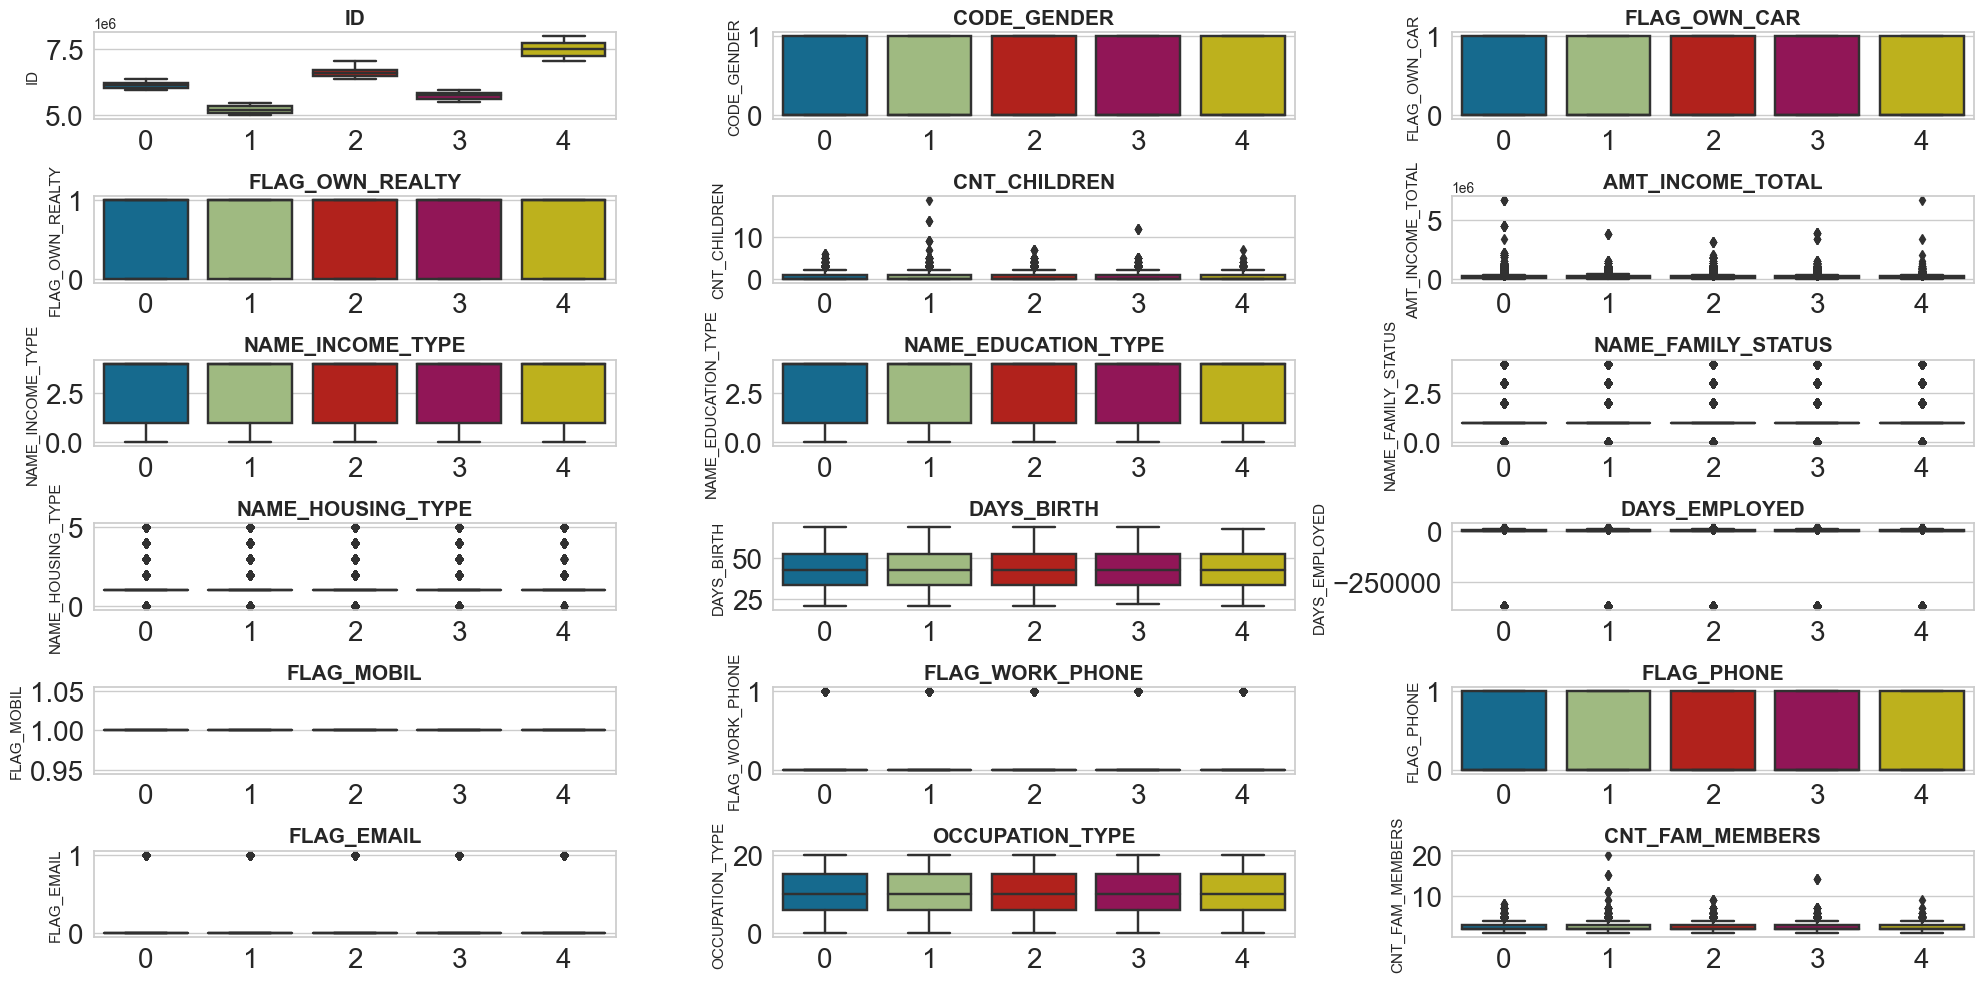

In [14]:
fig, axes = plt.subplots(nrows = 6, ncols = 3 , figsize = (20, 10))


axes = axes.flat

columnas = df.columns.drop("Cluster")

for i, colum in enumerate(columnas): 
    sns.boxplot(
        data = df,
        x = 'Cluster',
        y = colum, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.tight_layout();